In [1]:
# Commented output corresponds to notebook run on 11 May, 2023
# Does not include OC20 or OC22 datasets

In [48]:
import cmasher as cmr
from collections import defaultdict
import colorcet as cc
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
from pprint import pprint

In [2]:
client = MongoClient('mongodb://localhost:5000/')
db = client['colabfit-2023-4-27']

### Getting aggregate statistics

In [3]:
chem_sys = set()
for ds in db.datasets.find():

    systems = ds['aggregated_info']['chemical_systems']
    if type(systems) == list:
        chem_sys.update(systems)
    elif type(systems) == str:
        chem_sys.add(systems)
    else:
        print("null_set? ", type(systems))
print(f"Number of distinct chemical systems: {len(chem_sys)}")
# Number of distinct chemical systems: 68474


Number of distinct chemical systems: 68474


In [4]:
# Atoms per system
atoms_per_sys = defaultdict(int)
for system in chem_sys:
    caps = sum([x.isupper() for x in system])
    atoms_per_sys[caps] += 1
print(atoms_per_sys)
# defaultdict(<class 'int'>, {20: 844, 4: 27662, 2: 3160, 5: 7769, 3: 21028, 13: 882, 15: 339, 6: 1883, 1: 89, 7: 1023, 14: 766, 18: 206, 16: 70, 10: 62, 8: 1006, 11: 200, 17: 58, 23: 73, 12: 569, 19: 500, 24: 44, 21: 108, 26: 5, 22: 104, 25: 16, 9: 8})

defaultdict(<class 'int'>, {4: 27662, 5: 7769, 3: 21028, 20: 844, 8: 1006, 13: 882, 2: 3160, 19: 500, 12: 569, 6: 1883, 14: 766, 7: 1023, 15: 339, 18: 206, 21: 108, 24: 44, 11: 200, 1: 89, 22: 104, 17: 58, 23: 73, 10: 62, 25: 16, 16: 70, 9: 8, 26: 5})


In [5]:
# pprint(dict(sorted(list(atoms_per_sys.items()), key=lambda x: x[0])))
# {1: 89,
#  2: 3160,
#  3: 21028,
#  4: 27662,
#  5: 7769,
#  6: 1883,
#  7: 1023,
#  8: 1006,
#  9: 8,
#  10: 62,
#  11: 200,
#  12: 569,
#  13: 882,
#  14: 766,
#  15: 339,
#  16: 70,
#  17: 58,
#  18: 206,
#  19: 500,
#  20: 844,
#  21: 108,
#  22: 104,
#  23: 73,
#  24: 44,
#  25: 16,
#  26: 5}


{1: 89,
 2: 3160,
 3: 21028,
 4: 27662,
 5: 7769,
 6: 1883,
 7: 1023,
 8: 1006,
 9: 8,
 10: 62,
 11: 200,
 12: 569,
 13: 882,
 14: 766,
 15: 339,
 16: 70,
 17: 58,
 18: 206,
 19: 500,
 20: 844,
 21: 108,
 22: 104,
 23: 73,
 24: 44,
 25: 16,
 26: 5}


In [6]:
atoms_per_sys = {1: 89, 2: 3160, 3: 21028, 4: 27662, 5: 7769, 6: 1883, 7: 1023, 8: 1006, 9: 8, 10: 62, 11: 200, 12: 569, 13: 882, 14: 766, 15: 339, 16: 70, 17: 58, 18: 206, 19: 500, 20: 844, 21: 108, 22: 104, 23: 73, 24: 44, 25: 16, 26: 5}

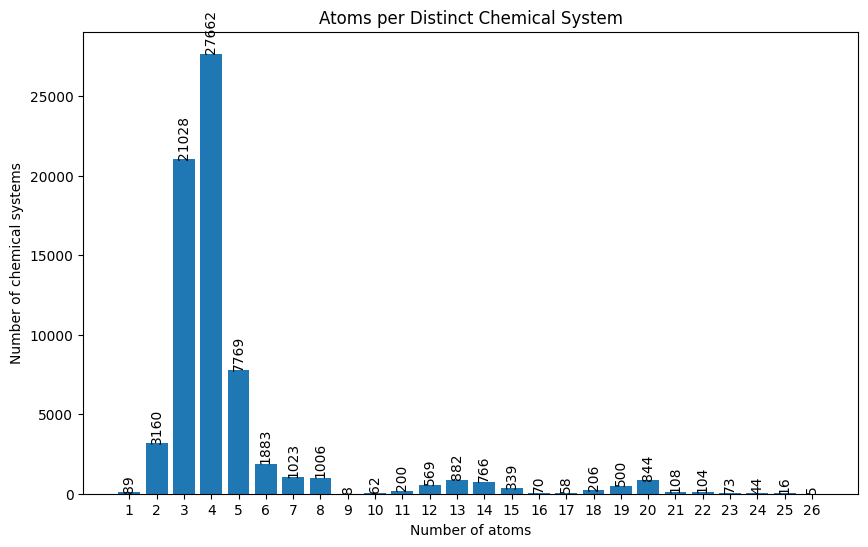

In [121]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(atoms_per_sys.keys(),atoms_per_sys.values())
ax.set_title("Atoms per Distinct Chemical System")
ax.set_ylabel("Number of chemical systems")
ax.set_xlabel("Number of atoms")
ax.set_xticks(range(1,27))
ax.bar_label(ax.containers[0], label_type="edge", rotation=90)
plt.savefig("atoms_per_chem_system.pdf")

In [ ]:

do_per_config = defaultdict(int)
for config in db.configurations.find():
    do_per_config[len(config['relationships']['data_objects'])] += 1
with open("data_objects_per_config.txt", "w") as f:
    f.write(str(do_per_config))

In [122]:
# Find configurations with large numbers of data objects pointing to them
with open("large_do_per_config.txt", "w") as f:
    for config in db.configurations.find():
        if len(config['relationships']['data_objects']) > 10:
            f.write(str(config))
            f.write("\n")


In [9]:
total_configs = db.configurations.estimated_document_count()
total_data_obj = db.data_objects.estimated_document_count()
total_datasets = db.datasets.estimated_document_count()
print(f"Total Configurations: {total_configs}\nTotal DOs: {total_data_obj}\nTotal Datasets: {total_datasets}")
# Total Configurations: 15616109
# Total DOs: 15867694
# Total Datasets: 109

Total Configurations: 15616109
Total DOs: 15867694
Total Datasets: 109


In [10]:
# total_config_sets = db.configuration_sets.estimated_document_count()
# print(f"Total CS: {total_config_sets}")
# Total CS: 568

Total CS: 568


In [18]:
# Property counts

# pot_energy = db.property_instances.count_documents({"type":"potential-energy"})
# print(f"Num Pot. Energies: {pot_energy}")
# # Num Pot. Energies: 9183283

# free_energy = db.property_instances.count_documents({"type":"free-energy"})
# print(f"Num Free Energies: {free_energy}")
# # Num Free Energies: 6377296

# atomic_forces = db.property_instances.count_documents({"type":"atomic-forces"})
# print(f"Num Atomic Forces: {atomic_forces}")
# # Num Atomic Forces: 8155248

# formation_energy = db.property_instances.count_documents({"type":"formation-energy"})
# print(f"Num Formation Energies: {formation_energy}")
# # Num Formation Energies: 23869

# atomization_energy = db.property_instances.count_documents({"type":"atomization-energy"})
# print(f"Num Atomization Energies: {atomization_energy}")
# # Num Atomization Energies: 149752

# band_gap = db.property_instances.count_documents({"type":"band-gap"})
# print(f"Num Band Gap: {band_gap}")
# # Num Band Gap: 2852

# cauchy_stress = db.property_instances.count_documents({"type":"cauchy-stress"})
# print(f"Num Cauchy Stress: {cauchy_stress}")
# # Num Cauchy Stress: 7482852



Num Atomization Energies: 149752
Num Band Gap: 2852
Num Cauchy Stress: 7482852


In [39]:
# Atoms per dataset
atoms_per_ds = {}
for ds in db.datasets.find():
    atoms_per_ds[ds['name']]=(ds['aggregated_info']['nsites'], ds['aggregated_info']['total_elements_ratios'])
print(atoms_per_ds)
# [376978, 218820, 14180, 4650, 24851, 363129, 31437, 116380, 598356, 17964, 115805, 96736, 163746, 228396, 23041200, 1294832, 2812, 2450, 17982, 1483936, 304896, 5706023, 106761, 13500, 127913, 45667, 185070, 1857722, 45641, 1072856, 2407753, 4224, 135956, 45439, 3996, 165108, 165108, 223930, 22470, 46466, 524332, 42068, 35403, 1911177, 152130, 1186590, 2951584, 721113, 161580, 2838238, 1294832, 1467492, 4719, 307435, 247744, 26234002, 297397, 4224, 106761, 44480, 524332, 23735083, 2407753, 4022098, 1523988, 2736768, 576000, 694042, 698086, 248410, 12176245, 1479000, 504350, 2100100, 313150, 449000, 711378, 78249, 11938, 11938, 11938, 11938, 11938, 11938, 103804, 103804, 103804, 103804, 103804, 103804, 1000, 529214, 33240, 7629879, 2944000, 321600, 112218, 4513386, 887799, 383955, 15599712, 113804, 171018, 600000, 111768, 1975372, 143856, 117, 158304, 1841742, 137254445, 200038614]


{'3BPA': (376978, {'C': 0.44444238125301744, 'H': 0.44444238125301744, 'N': 0.07407594077107948, 'O': 0.03703929672288569}), 'ABC2D6-16_PRL2018': (218820, {'Al': 0.054876153916461015, 'Ar': 0.013134082807787223, 'Cl': 0.01401608628096152, 'Pb': 0.011735673156018646, 'Ge': 0.05652591170825336, 'N': 0.05542454985833105, 'O': 0.05818937939859245, 'Sn': 0.05571245772781282, 'Ga': 0.05518234165067178, 'P': 0.05783292203637693, 'Sb': 0.05563933826889681, 'Bi': 0.01056119184718033, 'Rb': 0.011301526368704871, 'As': 0.05675897998354812, 'B': 0.011429485421807878, 'In': 0.012759345580842702, 'Si': 0.05611461475185084, 'C': 0.05533315053468604, 'Kr': 0.012521707339365688, 'Te': 0.0127319257837492, 'Na': 0.011146147518508363, 'Tl': 0.012261219266977425, 'Br': 0.01489808975413582, 'He': 0.011667123663284892, 'Ca': 0.012110410382963167, 'Ne': 0.009327300977972764, 'S': 0.05649849191115986, 'Be': 0.012996983822319714, 'F': 0.013974956585321269, 'Ba': 0.009176492093958506, 'I': 0.01089936934466685, '

In [19]:
atoms_per_ds = []
for ds in db.datasets.find():
    atoms_per_ds.append(ds['aggregated_info']['nsites'])
print(atoms_per_ds)
# [376978, 218820, 14180, 4650, 24851, 363129, 31437, 116380, 598356, 17964, 115805, 96736, 163746, 228396, 23041200, 1294832, 2812, 2450, 17982, 1483936, 304896, 5706023, 106761, 13500, 127913, 45667, 185070, 1857722, 45641, 1072856, 2407753, 4224, 135956, 45439, 3996, 165108, 165108, 223930, 22470, 46466, 524332, 42068, 35403, 1911177, 152130, 1186590, 2951584, 721113, 161580, 2838238, 1294832, 1467492, 4719, 307435, 247744, 26234002, 297397, 4224, 106761, 44480, 524332, 23735083, 2407753, 4022098, 1523988, 2736768, 576000, 694042, 698086, 248410, 12176245, 1479000, 504350, 2100100, 313150, 449000, 711378, 78249, 11938, 11938, 11938, 11938, 11938, 11938, 103804, 103804, 103804, 103804, 103804, 103804, 1000, 529214, 33240, 7629879, 2944000, 321600, 112218, 4513386, 887799, 383955, 15599712, 113804, 171018, 600000, 111768, 1975372, 143856, 117, 158304, 1841742, 137254445, 200038614]


[376978, 218820, 14180, 4650, 24851, 31437, 116380, 598356, 17964, 115805, 96736, 163746, 228396, 23041200, 1294832, 2812, 2450, 17982, 1483936, 304896, 5706023, 106761, 13500, 127913, 45667, 185070, 1857722, 45641, 1072856, 2407753, 4224, 135956, 45439, 3996, 165108, 223930, 22470, 46466, 524332, 42068, 35403, 1911177, 152130, 1186590, 2951584, 721113, 161580, 2838238, 1467492, 4719, 307435, 247744, 26234002, 297397, 4224, 106761, 44480, 524332, 23735083, 2407753, 4022098, 1523988, 2736768, 576000, 694042, 698086, 248410, 12176245, 1479000, 504350, 2100100, 313150, 449000, 711378, 78249, 11938, 11938, 11938, 11938, 11938, 11938, 103804, 103804, 103804, 103804, 103804, 103804, 1000, 529214, 33240, 7629879, 2944000, 321600, 112218, 4513386, 887799, 383955, 15599712, 113804, 171018, 600000, 111768, 1975372, 143856, 117, 158304, 1841742, 137254445, 200038614]


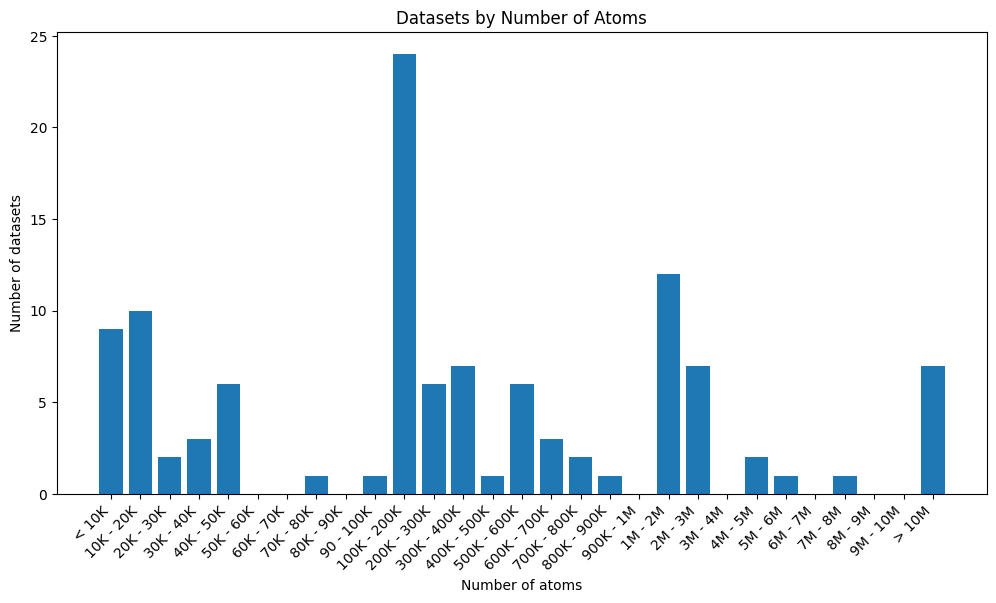

In [107]:
bins = [10000 * i for i in range(10)]
bins.extend([100000 * i for i in range(1,10)])
bins.extend([1000000 * i for i in range(1,11)])
bins.append(10000000000)
# print(bins)
hist, edges = np.histogram(a=atoms_per_ds, bins=bins)
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(range(len(bins)-1), hist, )
ax.set_ylabel("Number of datasets")
ax.set_xlabel("Number of atoms")
ax.set_title("Datasets by Number of Atoms")
ax.set_xticks(range(len(bins) -1))
ticklabels= ["< 10K", "10K - 20K", "20K - 30K", "30K - 40K", "40K - 50K", "50K - 60K", "60K - 70K",
             "70K - 80K", "80K - 90K",
             "90 - 100K", "100K - 200K", "200K - 300K", "300K - 400K", "400K - 500K", "500K - 600K", "600K - 700K", 
             "700K - 800K", "800K - 900K", "900K - 1M", "1M - 2M", "2M - 3M", "3M - 4M", "4M - 5M", "5M - 6M", 
             "6M - 7M", "7M - 8M", "8M - 9M", "9M - 10M", "> 10M"]
binned = [(b,bins[i+1]) for i, b in enumerate(bins[:-1])]
# pprint(list(zip(ticklabels, binned)))
# [(b,bins[i+1]) for i, b in enumerate(bins[:-1])]
ax.set_xticklabels(ticklabels, rotation=45, ha="right")
plt.savefig("datasets_by_n_atoms_detail.pdf")


In [81]:
# max(atoms_per_ds)
# 200038614

200038614

['< 100', '100 - 1K', '1K - 10K', '10K - 100K', '100K - 1M', '1M - 10M', '10M - 100M', '100M - 1B']


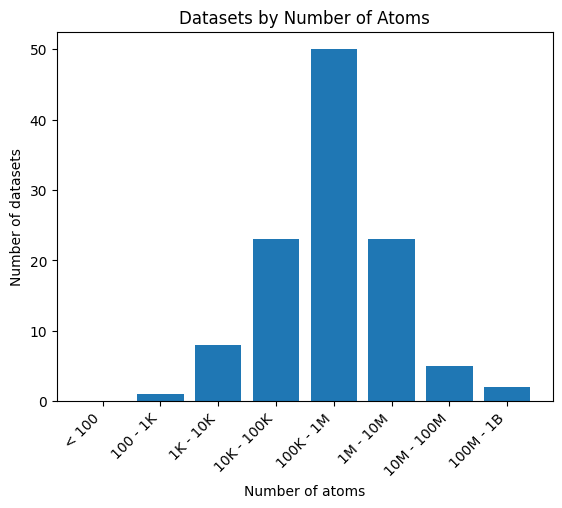

In [82]:
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
hist, edges = np.histogram(a=atoms_per_ds, bins=bins)
fig, ax = plt.subplots()
ax.bar(range(len(bins)-1), hist, )
ax.set_ylabel("Number of datasets")
ax.set_xlabel("Number of atoms")
ax.set_title("Datasets by Number of Atoms")
ticks = ax.set_xticks([0, 1,2,3,4,5,6,7])
ticklabels= ["< 100", "100 - 1K", "1K - 10K", "10K - 100K", "100K - 1M", "1M - 10M", "10M - 100M", "100M - 1B"]

print(ticklabels)
# [(b,bins[i+1]) for i, b in enumerate(bins[:-1])]
ax.set_xticklabels(ticklabels, rotation=45, ha="right")
plt.savefig("datasets_by_n_atoms_log.pdf")

In [21]:
# Total num atoms in database
total_atoms = sum(atoms_per_ds)
print(total_atoms)
# 512108838

510648898


In [13]:
# Configs per dataset
configs_per_ds = []
for ds in db.datasets.find():
    configs_per_ds.append(ds['aggregated_info']['nconfigurations'])
print(configs_per_ds)
# [13966, 21882, 1691, 1017, 2666, 2779, 1497, 15920, 49863, 1497, 6095, 5216, 1994, 4769, 115206, 17036, 383, 522, 1998, 338195, 1588, 90740, 1802, 1500, 2329, 3785, 3000, 20802, 3787, 6820, 133885, 363, 3192, 3775, 259, 7811, 7811, 3622, 1498, 3802, 25055, 3528, 2363, 143767, 7590, 51707, 53479, 5549, 9754, 50726, 17036, 79772, 174, 46328, 846, 126787, 15271, 363, 1802, 2157, 25055, 295001, 133885, 157365, 14538, 28508, 6000, 24949, 6890, 11518, 640855, 6550, 2835, 9151, 2357, 2694, 24511, 16748, 164, 164, 164, 164, 164, 164, 1402, 1402, 1402, 1402, 1402, 1402, 500, 7078, 277, 56824, 9200, 5025, 7255, 601114, 91977, 9845, 999988, 656, 2471, 10000, 6612, 44016, 7378, 1, 9471, 12930, 4075980, 6338038]

[13966, 21882, 1691, 1017, 2666, 2779, 1497, 15920, 49863, 1497, 6095, 5216, 1994, 4769, 115206, 17036, 383, 522, 1998, 338195, 1588, 90740, 1802, 1500, 2329, 3785, 3000, 20802, 3787, 6820, 133885, 363, 3192, 3775, 259, 7811, 7811, 3622, 1498, 3802, 25055, 3528, 2363, 143767, 7590, 51707, 53479, 5549, 9754, 50726, 17036, 79772, 174, 46328, 846, 126787, 15271, 363, 1802, 2157, 25055, 295001, 133885, 157365, 14538, 28508, 6000, 24949, 6890, 11518, 640855, 6550, 2835, 9151, 2357, 2694, 24511, 16748, 164, 164, 164, 164, 164, 164, 1402, 1402, 1402, 1402, 1402, 1402, 500, 7078, 277, 56824, 9200, 5025, 7255, 601114, 91977, 9845, 999988, 656, 2471, 10000, 6612, 44016, 7378, 1, 9471, 12930, 4075980, 6338038]


In [30]:
# Authors -- check to see whether any are duplicates with abbreviations/alternate spellings, etc.
# authors = defaultdict(set)
# for ds in db.datasets.find():
#     for author in ds['authors']:
#         authors[author].update(ds['links'])
# print(authors)
# {'Jun Cheng', 'Christian Holm', 'Chang Li', 'F. Faber', 'Fritz Körmann', 'A. Jain', 'Aidan P. Thompson', 'Shyue Ping Ong', 'Jacek R. Golebiowski', 'L.P. Swiler', 'Gustav Johansson', 'B. Cheng, E. Engel, J. Behler, C. Dellago, M. Ceriotti', 'C. W. Rosenbrock', 'Matthias Rupp', 'Ferenc Tasnádi', 'G. L. Hart', 'Yoshihiro Yayama', 'Yusuke Asano', 'Yifan Zhu', 'Chikashi Shinagawa', 'Tim Mueller', 'Benjamin Nebgen', 'G. J. Tucker', 'Rui Wang', 'Itai Leven', 'Sarath Menon', 'D. Skinner', 'Lars Schaaf', 'Ryohto Sawada', 'Akihide Hayashi', 'Dongsun Yoo', 'B. Onat', 'Berk Onat', 'Per-Ola Norrby', 'Linfeng Zhang', 'N. Bernstein', 'Huayun Geng', 'Huziel E. Sauceda', 'Musen Zhou', 'Piero Gasparotto', 'Anand Narayanan Krishnamoorthy', 'Blazej Grabowski', 'Andrew Rohskopf', 'Nongnuch Artritha', 'April M. Cooper', 'Xiangguo Li', 'J. Byggmästar', 'R. J. Maurer', 'Jinzhe Zeng', 'Jörg Behler', 'Kevin H. Koh', 'Justin S. Smith', 'Ralf Drautz', 'Steen Lysgaard', 'Olaf Wiest', 'Junhua Li', 'O. Anatole von Lilienfeld', 'Attila Cangi', 'S. Cholia', 'Edvin Fako', 'Tengfei Luo', 'Jianxing Huang', 'E. B. Tadmor', 'S.P. Ong', 'Zhi Deng', 'Davis Unruh', 'Kyuhyun Lee', 'Yu Xie', 'Mario Geiger', 'Brayden Bekker', 'Johannes Kästner', 'Jonathan P. Mailoa', 'Daniel Hedman', 'Sandip De', 'Jun-Ping Du', 'Nobuyuki Ishikawa', 'Marius Stan', 'Ole Winther', 'Wenqing Zhang', 'Dávid Péter Kovács', 'Jiri Kucera', 'Albert P. Bartok', 'Takao Kudo', 'Shigenobu Ogata', 'Joerg Behler', 'Joel M. Bowman', 'Eungkyu Lee', 'S. Batzner', 'Saryu Fensin', 'A.P. Thompson', 'Seungwu Han', 'Ben Xu', 'Alex M. Maldonado', 'Connor Allen', 'Mengchao Shi', 'Himani N. Patel', 'Anton Bochkarev', 'D. Gunter', 'Jie Chen', 'Daniel J. Cole', 'Taiki Yamaguchi', 'Akshaya Das', 'Yury Lysogorskiy', 'Jonathan Vandermause', 'Wissam A. Saidi', 'Heine Anton Hansen', 'C. R. Trott', 'Marc Ong', 'Anders S. Christensen', 'Hongliang Yang', 'Chi Chen', 'G. Csanyi', 'Ansgar Schafer', 'Apurba Nandi', 'Christopher Sutton', 'Peijun Yu', 'Andrea Silva', 'B. D. Wirth', 'Mengyang Gu', 'Timothy Germann', 'Zeyu Liu', 'Jessalyn Sebastian', 'Tongqi Wen', 'Martin Head-Gordon', 'John L. A. Gardner', 'M. A. Cusentino', 'Takenori Yamamoto', 'Konstantin Gubaev', 'Liyang Ma', 'Matthias Scheffler', 'Tobias Morawietz', 'James Kermode', 'Sergei Tretiak', 'Toshiki Kataoka', 'Weinan E', 'A. V. Shapeev', 'Mihai-Cosmin Marinica', 'A. Hamedani', 'Hideki Mori', 'David M. Wilkins', 'Albert Musaelian', 'O. A. v. Lilienfeld', 'Gabor Csanyi', 'C.R. Trott', 'Alice E. A. Allen', 'Álvaro Vázquez-Mayagoitia', 'Arghya Bhowmik', 'Tasuku Onodera', 'Jinbao Zhao', 'Jan Weinreich', 'Brandon E. Haines', 'K. Gubaev', 'Andreas Møller Slavensky', 'Giovanni Barcaro', 'Lars Blumenthal', 'Anton Römer', 'Christoph Ortner', 'Weijie Chen', 'Nicola Molinari', 'Jin Soo Lim', 'Nicholas Lubbers', 'Wonseok Jeong', 'Ryuichiro Ishitani', 'Hideki Ono', 'Conrad W. Rosenbrock', 'A. P. Thompson', 'Shuhei Shinzato', 'Chen Qu', 'Jean-Bernard Maillet', 'David J. Srolovitz', 'Michael P. Desjarlais', 'Nav Nidhi Rajput', 'Takeshi Ibuka', 'Jianzhong Wu', 'Michele Ceriotti', 'Dan Zhao', 'Riccardo Conte', 'M. Gastegger', 'Yuri Mishin', 'Gergely T. Zimányi', 'Alexandre Tkatchenko', 'G. Hautier', 'Nithin Mathew', 'Yuji Ikeda', 'M. A. Wood', 'Mitchell A. Wood', 'Oufan Zhang', 'Leonid Burakovsky', 'S.M. Foiles', 'Yi-Shen Lin', 'Takafumi Ishii', 'L. P. Swiler', 'G. Ceder', 'Penghua Ying', 'Zhaoxuan Wu', 'Yaolong Zhanga', 'Albert P. Bartók', 'Denis Kramer', 'Christopher J. Stein', 'Nikolaj Rønne', 'Kiarash Gordiz', 'Klaus-Robert Müller', 'Maxim Makeev', 'Thomas Hammerschmidt', 'Angelo Ziletti', 'So Takamoto', 'Kosuke Nakago', 'Gus L. W. Hart', 'Mordechai Kornbluth', 'A. Lindmaa', 'Pandu Wisesa', 'Chris Benmore', 'Kristof T. Schütt', 'W. Chen', 'K. Nordlund', 'Fengbo Yuan', 'Junfan Xia', 'M. Wen', 'Rasha Atwi', 'Wenwen Li', 'Hiroki Iriguchi', 'Zheyong Fan', 'B. Kozinsky', 'Alessandro Fortunelli', 'Yinan Wang', 'Raghunathan Ramakrishnan', 'Yunxing Zuo', 'Jie Li', 'Andrea Grisafi', 'S. Dacek', 'Nontawat Charoenphakdee', 'Stefan Chmiela', 'Boris Kozinsky', ' Hao Li', 'Jian Liu', 'Ganesh Sivaraman', 'K.-R. Müller', 'Matteo Rinaldi', 'Jiawei Huang', 'R. Drautz', 'Daisuke Motoki', 'Jonas Busk', 'D. P. Kovacs', 'A. Musaelian', 'X. Fu, Z. Wu, W. Wang, T. Xie, S. Keten, R. Gomez-Bombarelli, T. Jaakkola', 'Stefaan S.P. Hessmann', 'Ruiyang Li', 'James R. Kermode', 'Mojtaba Haghighatlari', 'C. Ortner', 'Toon Verstraelen', 'J. R. Kermode', 'Alexander Urban', 'Tomas Polcar', 'Matous Mrovec', 'Paul Helquist', 'Zeyuan Tang', 'Malthe Kjær Bisbo', 'Volker L. Deringer', 'Ka Un Lao', 'K. T. Schütt', 'G. N. C. Simm', 'Kazuki Matsubara', 'J. Andreas Larsson', 'Florian Brix', 'Luca M. Ghiringhelli', 'Yiming Chen', 'Angelos Michaelides', 'Yabei Wu', 'Yuzhi Zhang', 'Fredrik Sandin', 'Ganga P. Purja Pun', 'R. Armiento', 'Taylor R. Quinn', 'Shuang Han', 'Niklas W.A. Gebauer', 'Svetoslav Nikolov', 'Leonid Komissarov', 'Kipton Barros', 'Hai Ah Nam', 'Julien Tranchida', 'Jie Liu', 'Cas van der Oord', 'M.A. Cusentino', 'Fan-Shun Meng', 'Meili Liu', 'K.A. Persson', 'Tejs Vegge', 'Jing Wu', 'Nongnuch Artrith', 'Matthew Bliss', 'Christopher M. Andolina', 'Mikkel Elkjær Pedersen', 'Pinghui Mo', 'Bin Jiang', 'L. B. Partay', 'Asegun Henry', 'I. Batatia', 'Noam Bernstein', 'Alexander V. Shapeev', 'Farnaz Heidar-Zadeh', 'Han Wang', 'G. L. W. Hart', 'Mads-Peter V. Christiansen', 'Martín Leandro Paleico', 'Liyi Bai', 'Robert A. DiStasio Jr', 'Cameron J. Owen', 'E. V. Podryabinkin', 'Bjørk Hammer', 'Hongxia Hao', 'A. Tkatchenko', 'Jianchuan Liu', 'Lingyu Zhu', 'Jiong Yang', 'Lixin Sun', 'Yoshiyuki Miyamoto', 'Iori Kurata', 'Luke Bertels', 'Wojciech J. Szlachta', 'Shi Liu', 'Erting Dong', 'Teresa Head-Gordon', 'F. Djurabekova', 'Pavlo O. Dral', 'Tess E. Smidt', 'S. M. Foiles', 'Yujia Zhang', 'M.A. Wood', 'G.J. Tucker', 'Haidi Wang', 'Michael Gastegger', 'Patrick Rowe', 'Paul L. Houston', 'Xiangyue Liu', 'Qi Yu', 'Chandramouli Nyshadham', 'Matthias Baur', 'Xiaoyang Wang', 'Yang Yang', 'Gábor Csányi', 'Roberto Car', 'Mathias Schreiner', 'Pavlo Dral', 'Taku Watanabe', 'Jörg Neugebauer', 'David W. Wingate', 'Zoé Faure Beaulieu', 'Aidan Thompson', 'Simon Batzner', 'Tom Rothe', 'Reza Vatan Meidanshahi', 'Marvin Poul', 'W.D. Richards', 'Jiequn Han', 'Tao Chen', 'Xingyi Guan', 'Mohan Chen', 'Stephen M. Goodnick'}

defaultdict(<class 'set'>, {'Dávid Péter Kovács': {'https://doi.org/10.1021/acs.jctc.1c00647'}, 'Cas van der Oord': {'https://doi.org/10.1021/acs.jctc.1c00647', 'https://doi.org/10.1038/s41524-021-00559-9', 'https://doi.org/10.5281/zenodo.4734035'}, 'Jiri Kucera': {'https://doi.org/10.1021/acs.jctc.1c00647'}, 'Alice E. A. Allen': {'https://doi.org/10.1021/acs.jctc.1c00647'}, 'Daniel J. Cole': {'https://doi.org/10.1021/acs.jctc.1c00647'}, 'Christoph Ortner': {'https://doi.org/10.1063/5.0016005', 'https://doi.org/10.5281/zenodo.4734035', 'https://doi.org/10.1021/acs.jctc.1c00647', 'https://github.com/DescriptorZoo/sensitivity-dimensionality-results/tree/master/datasets', 'https://doi.org/10.1038/s41524-021-00559-9'}, 'Gábor Csányi': {'https://doi.org/10.1038/s41524-020-00367-7', 'https://github.com/argonne-lcf/active-learning-md', 'https://doi.org/10.1021/acs.jpca.9b08723', 'https://www.repository.cam.ac.uk/handle/1810/307452', 'https://doi.org/10.5281/zenodo.4734035', 'https://github.co

In [31]:
# with open("authors_links_no_oc.txt", 'w') as f:
#     for key in authors:
#         line = f"{key}\t{str(authors[key])}\n"
#         f.write(line)

In [32]:
# sorted_authors = sorted(list(authors.keys()), key=lambda x: x.split()[-1])
# with open("authors_no_oc.txt", 'w') as f:
#     for key in authors:
#         f.writelines([x + '\n' for x in sorted_authors])

# 332 Unique authors (after checking for duplicates)


In [16]:
# Unique papers
links = set()
for ds in db.datasets.find():
    links.update(ds['links'])
print(links)
# {'https://github.com/FitSNAP/FitSNAP/tree/master/examples/Ta_Linear_JCP2014', 'https://doi.org/10.1016/j.commatsci.2015.11.047', 'https://doi.org/10.1103/PhysRevMaterials.5.073801', 'https://github.com/DescriptorZoo/sensitivity-dimensionality-results/tree/master/datasets/TiO2', 'https://doi.org/10.5281/zenodo.5109599', 'https://doi.org/10.1038/s41467-019-12875-2', 'https://doi.org/10.6084/m9.figshare.19658538.v2', 'https://doi.org/10.1103/PhysRevX.8.041048', 'https://gitlab.com/kgubaev/accelerating-high-throughput-searches-for-new-alloys-with-active-learning-data', 'https://github.com/rashatwi/combat/', 'https://doi.org/10.48550/arXiv.2007.09593', 'https://doi.org/10.24435/materialscloud:r0-84', 'https://github.com/mengfsou/NNIP-FeH', 'https://doi.org/10.1016/j.commatsci.2021.111180', 'https://arxiv.org/abs/2207.12858', 'https://doi.org/10.1038/s41598-022-20009-w', 'https://github.com/dgunruh/Si-H-GAP', 'https://doi.org/10.17863/CAM.65004', 'https://github.com/jla-gardner/carbon-data', 'https://doi.org/10.1063/5.0088017', 'https://doi.org/10.48550/arXiv.2211.16443', 'https://doi.org/10.1021/acs.jpca.0c02450', 'https://github.com/RuiyangLi6/NNP_Ga2O3', 'https://doi.org/10.48550/arXiv.1906.08888', 'https://doi.org/10.1016/j.cpc.2019.04.014', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=HfO2-dpgen', 'https://doi.org/10.6084/m9.figshare.12672038.v3', 'https://doi.org/10.1038/s41524-021-00559-9', 'https://doi.org/10.1038/s41524-020-00390-8', 'https://github.com/DescriptorZoo/sensitivity-dimensionality-results', 'https://gitlab.com/agox/agox_data', 'https://doi.org/10.24435/materialscloud:14-4m', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=Ti', 'https://github.com/argonne-lcf/active-learning-md', 'https://doi.org/10.1038/s41524-022-00807-6', 'https://doi.org/10.1038/s41467-022-32294-0', 'https://doi.org/10.1063/5.0089200', 'https://gitlab.com/acclab/gap-data/-/tree/master/', 'https://doi.org/10.26434/chemrxiv-2023-wdd1r', 'https://doi.org/10.5281/zenodo.7278341https://github.com/saidigroup/Metal-Oxide-Dataset/tree/v1.0', 'https://github.com/kyonofx/MDsim/', 'https://doi.org/10.1021/acs.jcim.1c01170', 'https://doi.org/10.1038/s41524-020-0323-8', 'https://doi.org/10.17617/3.A3MB7Z', 'https://doi.org/10.1016/j.eml.2022.101929', 'https://doi.org/10.1038/s41467-018-06169-2', 'https://gitlab.com/acclab/gap-data/-/tree/master/W/2019-05-24', 'https://doi.org/10.5281/zenodo.7112197', 'http://sgdml.org/', 'https://archive.materialscloud.org/record/2018.0020/v1', 'https://doi.org/10.1103/PhysRevB.103.024108', 'https://github.com/jmbowma/QM-22', 'https://doi.org/10.48550/arXiv.2209.05059', 'https://doi.org/10.24435/materialscloud:94-aq', 'https://github.com/msg-byu/agpd', 'https://doi.org/10.1016/j.cpc.2020.107206', 'https://doi.org/10.1038/s41524-019-0239-3', 'http://quantum-machine.org/datasets/', 'https://aip.scitation.org/doi/10.1063/5.0005084', 'https://doi.org/10.1103/PhysRevB.90.104108', 'https://github.com/FitSNAP', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=Sn-SCAN', 'https://doi.org/10.5281/zenodo.7196578', 'https://doi.org/10.1016/j.commatsci.2020.110044', 'https://qmml.org/datasets.html', 'https://doi.org/10.1073/pnas.1602375113', 'https://doi.org/10.1103/PhysRevB.100.144105', 'https://arxiv.org/pdf/2301.09931', 'https://github.com/LiuGroupHNU/nvnmd', 'https://doi.org/10.1103/PhysRevB.104.174107', 'https://doi.org/10.5281/zenodo.4734035', 'https://doi.org/10.24435/materialscloud:2020.0037/v1', 'https://doi.org/10.17863/CAM.54529', 'https://doi.org/10.1063/5.0025051', 'https://github.com/FitSNAP/FitSNAP/tree/master/examples/InP_JPCA2020', 'https://doi.org/10.1038/sdata.2014.22', 'https://doi.org/10.48550/arXiv.2210.07237', 'https://github.com/davkovacs/BOTNet-datasets', 'https://doi.org/10.24435/materialscloud:cv-zd', 'https://gitlab.com/acclab/gap-data/-/tree/master/Mo', 'https://doi.org/10.17632/pjv2yr7pvr.1', 'https://github.com/LarsSchaaf/reaction-barriers-mlffs', 'https://www.nature.com/articles/s41524-019-0189-9', 'https://doi.org/10.1103/PhysRevB.104.104101', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=LiSiPS-SSE-PBEsol', 'https://doi.org/10.1038/s41524-021-00661-y', 'https://doi.org/10.1038/s41597-022-01160-5', 'https://doi.org/10.1063/5.0041849', 'https://doi.org/10.24435/materialscloud:2019.0002/v3', 'https://doi.org/10.1038/s41597-019-0157-8', 'https://aip.scitation.org/doi/10.1063/5.0016005', 'https://doi.org/10.1021/acs.jpca.9b08723', 'https://doi.org/10.23729/1b845398-5291-4447-b417-1345acdd2eae', 'https://www.sciencedirect.com/science/article/pii/S0021999114008353', 'https://doi.org/10.48550/arXiv.1805.09003', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=Ag-PBE', 'https://doi.org/10.1038/s41524-022-00773-z', 'https://doi.org/10.1038/s41597-022-01330-5', 'https://doi.org/10.1103/PhysRevB.99.184305', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=LiGePS-SSE-PBEsol', 'https://doi.org/10.1021/acs.jpclett.9b00085', 'http://dx.doi.org/10.1016/j.commatsci.2015.11.047', 'https://doi.org/10.1038/s41467-022-28526-y', 'https://www.pnas.org/doi/full/10.1073/pnas.1815117116', 'https://github.com/atomistic-ml/ani-al', 'https://doi.org/10.6084/m9.figshare.12649811.v1', 'https://www.repository.cam.ac.uk/handle/1810/307452', 'https://github.com/FitSNAP/FitSNAP/tree/master/examples/WBe_PRB2019', 'https://github.com/eisenforschung/magnesium-mtp-training-data', 'https://doi.org/10.1063/5.0121748', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=In2Se3-2D-dpgen', 'https://doi.org/10.1038/s41524-021-00617-2', 'https://www.nature.com/articles/s41467-022-28526-y', 'https://arxiv.org/pdf/2207.11828.pdf', 'https://arxiv.org/abs/2205.06643', 'https://github.com/UncertaintyQuantification/AFF/tree/master', 'https://www.sciencedirect.com/science/article/pii/S0927025618306372?via%3Dihub', 'https://doi.org/10.24435/materialscloud:6h-yj', 'https://doi.org/10.1103/PhysRevB.104.094310', 'https://eprints.soton.ac.uk/443461/', 'https://doi.org/10.1371/journal.pone.0264960.s001', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=LiGePS-SSE-PBE', 'https://doi.org/10.1021/acs.jctc.1c00647', 'https://github.com/DescriptorZoo/sensitivity-dimensionality-results/tree/master/datasets', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=Au-PBE', 'https://github.com/materialsvirtuallab/mlearn', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=Cu-dpgen', 'https://doi.org/10.1103/PhysRevMaterials.4.093802', 'https://doi.org/10.24435/materialscloud:s0-5n', 'https://doi.org/10.1103/PhysRevB.104.104309', 'https://doi.org/10.1016/j.cartre.2021.100027', 'https://doi.org/10.1038/s41524-020-00367-7', 'http://doi.org/10.1021/acs.jpcc.0c00559', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=AgAu-nanoalloy', 'https://doi.org/10.1063/5.0005084', 'https://doi.org/10.1021/acs.jpclett.2c03445', 'https://figshare.com/articles/dataset/QM9x/20449701', 'https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.117.135502', 'https://doi.org/10.1103/PhysRevMaterials.6.065603', 'https://doi.org/10.1016/j.commatsci.2018.09.031', 'https://doi.org/10.1103/PhysRevMaterials.5.113606', 'https://github.com/atomistic-machine-learning/cG-SchNet/', 'https://doi.org/10.1038/s41467-022-30687-9', 'https://doi.org/10.1063/5.0016005', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=deepmd-se-dataset', 'https://materialsproject.org/', 'https://github.com/zhangylch/REANN', 'http://ann.atomistic.net/download/', 'https://doi.org/10.1103/PhysRevLett.98.146401', 'https://doi.org/10.6084/m9.figshare.19601689.v3', 'https://doi.org/10.5281/zenodo.7018572', 'https://github.com/ConnorSA/ndsc_tut', 'https://doi.org/10.6084/m9.figshare.c.978904.v5', 'https://arxiv.org/abs/2207.04009', 'https://doi.org/10.1016/j.jcp.2014.12.018', 'https://www.nature.com/articles/s41524-020-00477-2#', 'https://gitlab.com/acclab/gap-data/-/tree/master', 'https://doi.org/10.5281/zenodo.2634097', 'https://doi.org/10.1063/5.0080766', 'https://doi.org/10.1371/journal.pone.0264960', 'https://doi.org/10.1038/s41467-022-29939-5', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=LiSnPS-SSE-PBE', 'https://www.aissquare.com/datasets/detail?pageType=datasets&name=LiSiPS-SSE-PBE', 'https://zenodo.org/record/5645281#.Y2CPkeTMJEa', 'https://doi.org/10.1038/s41467-021-21376-0', 'https://doi.org/10.48550/arXiv.2108.06232', 'https://www.nature.com/articles/s41467-018-06169-2', 'https://arxiv.org/abs/1508.05315https://qmml.org/datasets.html'}

{'https://github.com/FitSNAP/FitSNAP/tree/master/examples/Ta_Linear_JCP2014', 'https://doi.org/10.1016/j.commatsci.2015.11.047', 'https://doi.org/10.1103/PhysRevMaterials.5.073801', 'https://github.com/DescriptorZoo/sensitivity-dimensionality-results/tree/master/datasets/TiO2', 'https://doi.org/10.5281/zenodo.5109599', 'https://doi.org/10.1038/s41467-019-12875-2', 'https://doi.org/10.6084/m9.figshare.19658538.v2', 'https://doi.org/10.1103/PhysRevX.8.041048', 'https://gitlab.com/kgubaev/accelerating-high-throughput-searches-for-new-alloys-with-active-learning-data', 'https://github.com/rashatwi/combat/', 'https://doi.org/10.48550/arXiv.2007.09593', 'https://doi.org/10.24435/materialscloud:r0-84', 'https://github.com/mengfsou/NNIP-FeH', 'https://doi.org/10.1016/j.commatsci.2021.111180', 'https://arxiv.org/abs/2207.12858', 'https://doi.org/10.1038/s41598-022-20009-w', 'https://github.com/dgunruh/Si-H-GAP', 'https://doi.org/10.17863/CAM.65004', 'https://github.com/jla-gardner/carbon-data',

In [20]:
with open("papers_no_oc.txt", 'w') as f:
    f.writelines([x + '\n' for x in links])

In [108]:
with open("links_no_oc.txt", 'r') as f:
    text = [x for x in f.readlines() if "https://github.com" not in x]
with open("papers_links.txt", 'w') as f:
    f.writelines(text)

In [112]:
with open("papers_links.txt", 'r') as f:
    text = [x for x in f.readlines() if "figshare.com" not in x]
with open("papers_links.txt", 'w') as f:
    f.writelines(text)
# removed gitlab, zenodo, aissquare, figshare.com

#### Getting total ratios of chemicals

total_atoms  
within dataset, total atoms * ratio_chemx = num_chem_x:  
    total_chem_x += num_chem_x

In [14]:
DS = db.datasets.find_one()

In [15]:
for key, val in DS['aggregated_info']['total_elements_ratios'].items():
        print(key, val)

C 0.44444238125301744
H 0.44444238125301744
N 0.07407594077107948
O 0.03703929672288569


In [16]:
chem_dict = defaultdict(int)
for ds in db.datasets.find():
    atom_tot = ds['aggregated_info']['nsites']
    for key, val in ds['aggregated_info']['total_elements_ratios'].items():
        chem_dict[key] += atom_tot * val

In [27]:
ratios = {key: val/total_atoms for key, val in chem_dict.items()}
print(ratios, '\n', 
    #    sum(ratios.values())
       )

{'C': 0.18675437345210916, 'H': 0.1059127283184698, 'N': 0.013820237403116848, 'O': 0.28601882344608526, 'Al': 0.006640541110107321, 'Ar': 5.861169997080851e-06, 'Cl': 0.006330911537578604, 'Pb': 0.0011874499335549334, 'Ge': 0.006693503135690699, 'Sn': 0.03838879331136831, 'Ga': 0.0043057059529775, 'P': 0.01630180351431993, 'Sb': 0.0024413466961011633, 'Bi': 0.0016951431862289067, 'Rb': 0.0016936235511077124, 'As': 0.0019349792075728713, 'B': 0.004094462963082709, 'In': 0.001763340728877868, 'Si': 0.017823772920391185, 'Kr': 1.3649299993201983e-05, 'Te': 0.0029365245002447847, 'Na': 0.008140505181311484, 'Tl': 0.0009582474414739655, 'Br': 0.002547642822877491, 'He': 7.139935118395184e-06, 'Ca': 0.0028407424468778544, 'Ne': 4.0752070711410796e-06, 'S': 0.02740355859927852, 'Be': 0.0014986285155950733, 'F': 0.014564835112989904, 'Ba': 0.002392626332466892, 'I': 0.002670870348181971, 'Cs': 0.0013792568685813554, 'Xe': 8.172347020320016e-05, 'Se': 0.005027184059447436, 'Sr': 0.002234836899

In [71]:
xy = zip(ratios.keys(), ratios.values())
sort_xy = sorted(xy, key = lambda x: -x[1])

In [72]:
sort_xy

[('O', 0.28601882344608526),
 ('C', 0.18675437345210916),
 ('H', 0.1059127283184698),
 ('Au', 0.07078356017523414),
 ('Sn', 0.03838879331136831),
 ('S', 0.02740355859927852),
 ('Li', 0.020868250263021228),
 ('Pt', 0.01926003764723683),
 ('Si', 0.017823772920391185),
 ('P', 0.01630180351431993),
 ('F', 0.014564835112989904),
 ('N', 0.013820237403116848),
 ('Cu', 0.011639925246641774),
 ('Fe', 0.010671592597855759),
 ('Na', 0.008140505181311484),
 ('Mg', 0.007864156792912533),
 ('Mn', 0.006899531192173453),
 ('Ge', 0.006693503135690699),
 ('Al', 0.006640541110107321),
 ('Ni', 0.006497013922861731),
 ('Cl', 0.006330911537578604),
 ('Co', 0.00589895917096447),
 ('Mo', 0.005780504004925905),
 ('Ti', 0.005669885926200511),
 ('Se', 0.005027184059447436),
 ('V', 0.004787146333957231),
 ('Ag', 0.004461539051436473),
 ('Ga', 0.0043057059529775),
 ('B', 0.004094462963082709),
 ('Zn', 0.00390964321634549),
 ('K', 0.0033841060007535747),
 ('Cr', 0.0033121074120089455),
 ('Hf', 0.0029739866392505167

In [45]:
len(cmr.rainforest.colors)

256

In [108]:
cmap = []
for i, val in enumerate(sort_xy):
    if i % 2:
        cmap.append(cmr.rainforest.colors[i+40])
    else:
        cmap.append(cmr.rainforest.colors[100+i])
labels=[f"{i[0]} : {i[1]:.4f}" for i in sort_xy[:]]
# labels.extend([" " for i in sort_xy[15:]])

In [97]:
print(labels)

['O: 0.2860', 'C: 0.1868', 'H: 0.1059', 'Au: 0.0708', 'Sn: 0.0384', 'S: 0.0274', 'Li: 0.0209', 'Pt: 0.0193', 'Si: 0.0178', 'P: 0.0163', 'F: 0.0146', 'N: 0.0138', 'Cu: 0.0116', 'Fe: 0.0107', 'Na: 0.0081', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [106]:
colors = cmr.take_cmap_colors('Blues', 6, cmap_range=(.5, .95), return_fmt='hex')[::-1]

['O : 0.2860', 'C : 0.1868', 'H : 0.1059', 'Au : 0.0708', 'Sn : 0.0384', 'S : 0.0274', 'Li : 0.0209', 'Pt : 0.0193', 'Si : 0.0178', 'P : 0.0163', 'F : 0.0146', 'N : 0.0138', 'Cu : 0.0116', 'Fe : 0.0107', 'Na : 0.0081', 'Mg : 0.0079', 'Mn : 0.0069', 'Ge : 0.0067', 'Al : 0.0066', 'Ni : 0.0065', 'Cl : 0.0063', 'Co : 0.0059', 'Mo : 0.0058', 'Ti : 0.0057', 'Se : 0.0050', 'V : 0.0048', 'Ag : 0.0045', 'Ga : 0.0043', 'B : 0.0041', 'Zn : 0.0039', 'K : 0.0034', 'Cr : 0.0033', 'Hf : 0.0030', 'Te : 0.0029', 'W : 0.0029', 'Ca : 0.0028', 'I : 0.0027', 'Br : 0.0025', 'Sb : 0.0024', 'Ba : 0.0024', 'Sr : 0.0022', 'Nb : 0.0021', 'La : 0.0020', 'As : 0.0019', 'Ta : 0.0018', 'In : 0.0018', 'Bi : 0.0017', 'Rb : 0.0017', 'Be : 0.0015', 'Cs : 0.0014', 'Y : 0.0013', 'Zr : 0.0013', 'Pb : 0.0012', 'Cd : 0.0010', 'Tl : 0.0010', 'Nd : 0.0009', 'Pd : 0.0009', 'Ce : 0.0008', 'Pr : 0.0008', 'Hg : 0.0008', 'Sc : 0.0008', 'Ru : 0.0008', 'U : 0.0007', 'Sm : 0.0007', 'Rh : 0.0007', 'Yb : 0.0007', 'Er : 0.0006', 'Tb : 0.

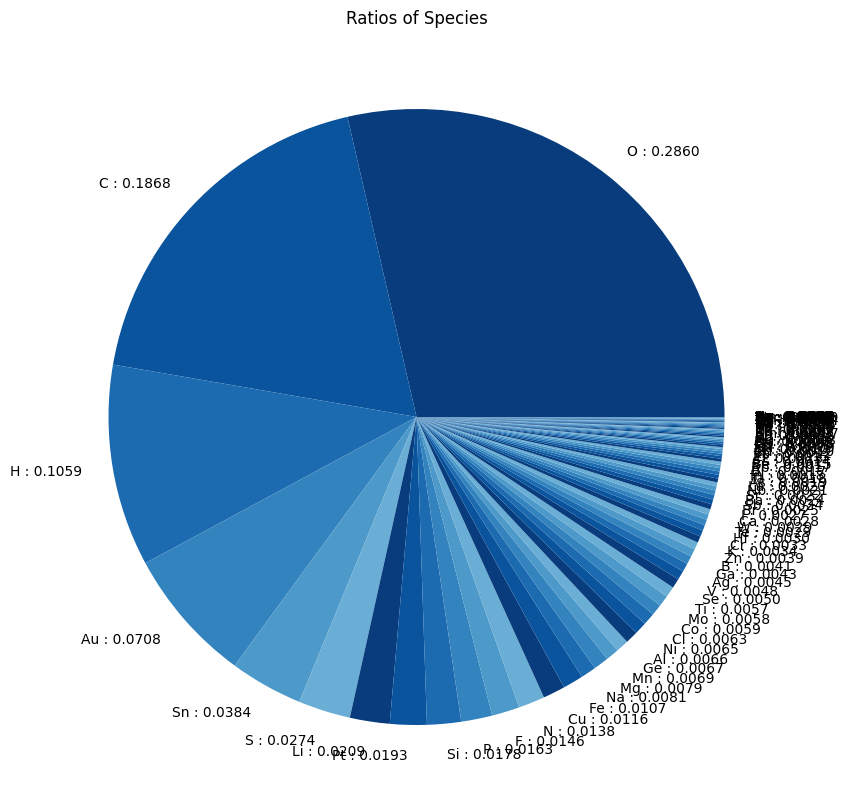

In [110]:
fig, ax = plt.subplots(figsize=(10,10))

ax.pie(x=[i[1] for i in sort_xy], labels=labels, colors=colors)
ax.set_title("Ratios of Species")
print(labels)
ax.set
plt.savefig("ratios_of_species.pdf")

### Exploring the many to one DO-config relationship

In [ ]:
suspect_ds = set()
with open(large_do_file, 'r') as f:
    for line in f:
        for do_id in line['relationships']['data_objects']:
            do = db.data_objects.find({"colabfit-id":do_id})
            dss = db.datasets.find({"colabfit-id":do['relationships']['datasets']})
            suspect_ds.update(dss)